In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from random import random
import numpy as np
import pandas as pd
from collections import Counter
N = 1000
ND = 2
def rand_point(n_dimens):
    return tuple(random() for i in range(n_dimens))
points = list(rand_point(ND) for i in range(N))

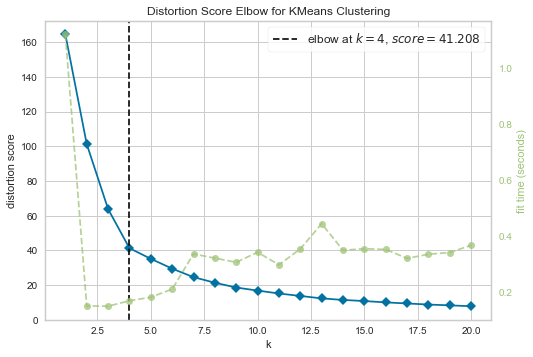

In [11]:
X= np.array(points)
km = KMeans(random_state=49)
visualizer = KElbowVisualizer(km, k=(1,21), locate_elbow=True )
visualizer.fit(X)
visualizer.show()

In [12]:
df = pd.DataFrame(data=X,columns=["1","2"])
df["names"]=df.index
names=df["names"]

def Results(X,elbow,N):
    km = KMeans(n_clusters=elbow)
    cl = km.fit_predict(X)
    centroids=km.cluster_centers_
    di={}
    for i in range(0,elbow):
        di[str(i)]=[]
    for i in range(0,N):
        di[str(cl[i])].append(names[i])
    return centroids,di

In [13]:
elbow=visualizer.elbow_value_
centroids,KMeanZ=Results(X,elbow,N)

In [14]:
print(KMeanZ)

{'0': [5, 10, 12, 14, 15, 17, 20, 27, 30, 31, 33, 35, 41, 44, 50, 52, 53, 58, 60, 63, 64, 68, 69, 70, 73, 74, 75, 80, 81, 82, 83, 87, 88, 89, 98, 101, 107, 111, 123, 137, 139, 142, 155, 159, 160, 161, 163, 167, 171, 176, 181, 187, 193, 194, 199, 201, 202, 210, 215, 217, 218, 223, 225, 230, 231, 235, 237, 239, 245, 247, 249, 254, 255, 257, 259, 261, 262, 268, 271, 272, 274, 275, 277, 278, 279, 281, 293, 294, 297, 298, 299, 305, 312, 316, 318, 319, 321, 329, 330, 332, 334, 343, 344, 349, 353, 360, 361, 365, 381, 383, 387, 390, 395, 407, 417, 419, 420, 423, 430, 445, 449, 451, 467, 468, 472, 474, 477, 478, 482, 484, 488, 492, 493, 495, 502, 509, 510, 516, 518, 519, 524, 527, 531, 535, 538, 539, 542, 547, 548, 549, 551, 552, 553, 565, 573, 576, 578, 580, 581, 585, 586, 590, 595, 596, 597, 600, 602, 614, 620, 635, 639, 645, 649, 650, 656, 659, 660, 665, 670, 671, 673, 675, 676, 681, 688, 691, 697, 701, 704, 707, 710, 718, 721, 724, 725, 727, 734, 736, 738, 741, 743, 749, 752, 755, 756, 757,

In [15]:
centroids

array([[0.25329831, 0.27171118],
       [0.74494822, 0.22400204],
       [0.24405427, 0.77590552],
       [0.73130462, 0.72781152]])

# Visualization

In [16]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [17]:
       
df["clusters"]=1
for i in range(0,N):
    try:
        if(df["names"][i] in KMeanZ['0']):
            df["clusters"][i]=1
        if(df["names"][i] in KMeanZ['1']):
            df["clusters"][i]=2
        if(df["names"][i] in KMeanZ['2']):
            df["clusters"][i]=3
        if(df["names"][i] in KMeanZ['3']):
            df["clusters"][i]=4
        if(df["names"][i] in KMeanZ['4']):
            df["clusters"][i]=5
    except:
        continue

In [18]:
import plotly.graph_objects as go
import plotly.express as px
colors=['','#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF']
Names =df["names"]
columns=df.columns
fig = px.scatter(df, x="1", y="2", text="names",size='clusters',color="clusters")
fig.update_traces(textposition='top center')
fig.update_layout(width=1000, height=1000,
        title_text='Data clusters',
         xaxis_title="First  Vector ",
                      yaxis_title="Second  Vector")         

fig.show()